In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import seaborn as sns
from warnings import filterwarnings
import matplotlib.pyplot as plt
filterwarnings('ignore')

In [2]:
data = pd.read_csv('C:\\Users\\nilav\\NCI Cell Lines\\Gemcitabine_metabolic_NCI.csv')
data.head(2)

,Cell Line,Acetone ; Propanal ; acetone,Acetaldehyde oxime ; HMDB01122,acetate,Urea,Isopropyl alcohol ; Propyl alcohol,Bicarbonate ; Hydrogen carbonate,Dimethylsulfide,3-Butyn-1-al,1-pyrrolinium,...,O-b-D-glucopyranosyl-(1->3)-O-2-(acetylamino)-2-deoxy-b-D-glucopyranosyl-(1->3)-O-[6-deoxy-a-L-galactopyranosyl-(1->4)]-O-b-D-galactopyranosyl-(1->4)-O-[6-deoxy-a-L-galactopyranosyl-(1->3)]-D-Glucose,LS tetrasaccharide d ; Sialyllacto-N-neotetraose c ; Sialyllacto-N-tetraose a ; Sialyllacto-N-tetraose b ; Sialyllacto-N-tetraose c,PIP2(16:0/18:0) ; PIP2(18:0/16:0),"TG(22:5(7Z,10Z,13Z,16Z,19Z)/20:5(5Z,8Z,11Z,14Z,17Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))[iso6] ; TG(22:6(4Z,7Z,10Z,13Z,16Z,19Z)/20:4(5Z,8Z,11Z,14Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))[iso3]","(2E)-Hexadecenoyl-CoA ; 2,7,10-hexadecatrienoylcoa ; 3,7,10-hexadecatrienoylcoa ; 3Z,7Z,10Z-hexadecatrienoyl-CoA ; 4,7,10-hexadecatrienoylcoa ; 4Z,7Z,10Z-hexadecatrienoyl-CoA ; 7,10,13-hexadecatrienoylcoa ; trans,cis,cis-2,7,10-hexadecatrienoyl-CoA",Lacto-N-difucohexaose ; Lacto-N-difucopentaose II,Galabiosylceramide (d18:1/26:1(17Z)) ; Lactosylceramide (d18:1/26:1(17Z)),cells,Cell names,Gemcitabine
0,Breast_BT549,0.021811,0.006137,1.801231,0.178675,0.031762,0.143416,0.004437,0.001118,0.002353,...,0.036367,0.025836,0.075427,0.036502,0.019935,0.032820,0.039391,BT549,BR:BT-549,4.794
1,Breast_HS578T,0.010611,0.006815,0.884542,0.093390,0.016027,0.037372,NaN,0.005778,0.003199,...,0.024981,0.013982,0.054200,0.029125,0.010750,0.015981,0.035154,HS578T,BR:HS 578T,5.600


In [3]:
drug = data.pop('Gemcitabine')
drug.head()

0    4.794
1    5.600
2    5.888
3    6.273
4    6.937
Name: Gemcitabine, dtype: float64

In [4]:
X = data.select_dtypes('float64')
X.head(2)

,Acetone ; Propanal ; acetone,Acetaldehyde oxime ; HMDB01122,acetate,Urea,Isopropyl alcohol ; Propyl alcohol,Bicarbonate ; Hydrogen carbonate,Dimethylsulfide,3-Butyn-1-al,1-pyrrolinium,Acrylamide,...,PIP2(16:0/18:1(11Z)) ; PIP2(16:0/18:1(9Z)) ; PIP2(16:1(9Z)/18:0) ; PIP2(18:0/16:1(9Z)) ; PIP2(18:1(11Z)/16:0) ; PIP2(18:1(9Z)/16:0),"TG(22:6(4Z,7Z,10Z,13Z,16Z,19Z)/20:5(5Z,8Z,11Z,14Z,17Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))[iso3]","2,4,7,10-hexadecatetraenoylcoa ; 2,7,10,13-hexadecatetraenoylcoa ; 2E,4Z,7Z,10Z-hexadecatetraenoyl-CoA ; 3,7,10,13-hexadecatetraenoylcoa ; 4,7,10,13-hexadecatetraenoylcoa",O-b-D-glucopyranosyl-(1->3)-O-2-(acetylamino)-2-deoxy-b-D-glucopyranosyl-(1->3)-O-[6-deoxy-a-L-galactopyranosyl-(1->4)]-O-b-D-galactopyranosyl-(1->4)-O-[6-deoxy-a-L-galactopyranosyl-(1->3)]-D-Glucose,LS tetrasaccharide d ; Sialyllacto-N-neotetraose c ; Sialyllacto-N-tetraose a ; Sialyllacto-N-tetraose b ; Sialyllacto-N-tetraose c,PIP2(16:0/18:0) ; PIP2(18:0/16:0),"TG(22:5(7Z,10Z,13Z,16Z,19Z)/20:5(5Z,8Z,11Z,14Z,17Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))[iso6] ; TG(22:6(4Z,7Z,10Z,13Z,16Z,19Z)/20:4(5Z,8Z,11Z,14Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))[iso3]","(2E)-Hexadecenoyl-CoA ; 2,7,10-hexadecatrienoylcoa ; 3,7,10-hexadecatrienoylcoa ; 3Z,7Z,10Z-hexadecatrienoyl-CoA ; 4,7,10-hexadecatrienoylcoa ; 4Z,7Z,10Z-hexadecatrienoyl-CoA ; 7,10,13-hexadecatrienoylcoa ; trans,cis,cis-2,7,10-hexadecatrienoyl-CoA",Lacto-N-difucohexaose ; Lacto-N-difucopentaose II,Galabiosylceramide (d18:1/26:1(17Z)) ; Lactosylceramide (d18:1/26:1(17Z))
0,0.021811,0.006137,1.801231,0.178675,0.031762,0.143416,0.004437,0.001118,0.002353,0.013185,...,0.071269,0.029462,0.029300,0.036367,0.025836,0.075427,0.036502,0.019935,0.032820,0.039391
1,0.010611,0.006815,0.884542,0.093390,0.016027,0.037372,NaN,0.005778,0.003199,0.011203,...,0.059958,0.026807,0.021282,0.024981,0.013982,0.054200,0.029125,0.010750,0.015981,0.035154


In [5]:
X.fillna(0.0, inplace=True)

In [6]:
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

X.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X.columns.values]

In [7]:
labels = []
drug_mean = drug.mean()
for i in drug:
    if i >= drug_mean:
        labels.append('N')
    else:
        labels.append('R')
y = pd.Series(labels)

In [8]:
drug_mean

6.185857142857144

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = pd.Series(le.fit_transform(y))

In [10]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X,y = smote.fit_resample(X,y)

y.value_counts()

1    25
0    25
dtype: int64

In [11]:
'''
from xgboost import plot_importance
from sklearn.model_selection import train_test_split

model = RandomForestClassifier(class_weight = 'balanced', n_estimators = 150, random_state = 43)
model.fit(X, y)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="lightsalmon", align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()
'''

'\nfrom xgboost import plot_importance\nfrom sklearn.model_selection import train_test_split\n\nmodel = RandomForestClassifier(class_weight = \'balanced\', n_estimators = 150, random_state = 43)\nmodel.fit(X, y)\nimportances = model.feature_importances_\nindices = np.argsort(importances)[::-1]\n\nplt.figure()\nplt.title("Feature importances")\nplt.bar(range(X.shape[1]), importances[indices],\n        color="lightsalmon", align="center")\nplt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)\nplt.xlim([-1, X.shape[1]])\nplt.show()\n'

In [12]:
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
#sfm = SelectFromModel(model, threshold = 0.006)
#sfm.fit(X,y)

#X = pd.DataFrame(data = sfm.transform(X), columns = X.columns[sfm.get_support(1)])

indices = X.index.values


X_train, X_test, train_index, test_index = train_test_split(X,indices, test_size = 0.33, random_state = 43)
y_train, y_test = y.iloc[train_index], y.iloc[test_index]
model = RandomForestClassifier(class_weight = 'balanced', n_estimators = 150, random_state = 43)

rfecv = RFECV(model, min_features_to_select = 1, step = 1, cv = StratifiedKFold(5), scoring = 'precision')
#model.fit(X_train, y_train)

rfecv.fit(X_train, y_train)

rfe = RFE(model, n_features_to_select = rfecv.n_features_, step = 1)
rfe.fit(X_train, y_train)

prediction = rfe.predict_proba(X_test)[:, 1]
y_pred = rfe.predict(X_test)

print(f'Accuracy on training data: {accuracy_score(y_train, rfe.predict(X_train))}')
print(f'Accuracy on testing data: {accuracy_score(y_test, rfe.predict(X_test))}')
print(classification_report(y_test, y_pred))

Accuracy on training data: 1.0
Accuracy on testing data: 0.6470588235294118
              precision    recall  f1-score   support

           0       0.64      0.78      0.70         9
           1       0.67      0.50      0.57         8

    accuracy                           0.65        17
   macro avg       0.65      0.64      0.64        17
weighted avg       0.65      0.65      0.64        17



Text(50.722222222222214, 0.5, 'True Labels')

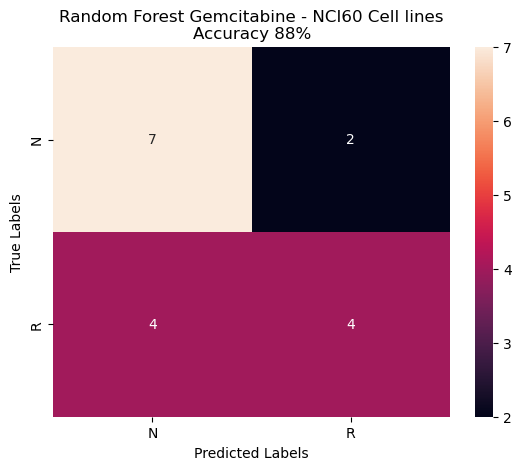

In [13]:
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots()
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, xticklabels = ['N', 'R'], yticklabels = ['N', 'R'])
ax.set_title('Random Forest Gemcitabine - NCI60 Cell lines\nAccuracy 88%')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')

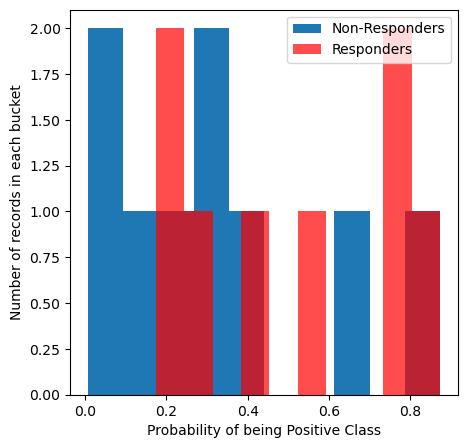

In [14]:
plt.figure(figsize=(5, 5))
plt.hist(prediction[y_test==0], label='Non-Responders')
plt.hist(prediction[y_test==1], label='Responders', alpha=0.7, color='r')
plt.xlabel('Probability of being Positive Class')
plt.ylabel('Number of records in each bucket')
plt.legend()
plt.tick_params(axis='both')
plt.show() 

In [15]:
responders = prediction[y_test == 1]
count = 0
for i in responders: 
    if i >= max(prediction[y_test == 0]):
        count+=1
count, count/len(responders)

(1, 0.125)

In [16]:
max(prediction[y_test == 0])

0.8733333333333333

In [17]:
df_rf_test = X_test.copy()
df_rf_test.loc[test_index, 'test_proba'] = prediction
df_rf_test.loc[test_index, 'target'] = y_test
df1 = pd.concat([X_train, df_rf_test], sort=False).sort_index()

In [18]:
df1_main = df1.iloc[:49, ]
x = max(prediction[y_test == 0])
df1_main = df1_main.loc[(df1_main['test_proba'] > x)]
df1_main.shape

(0, 2183)

In [19]:
model2 = SVC(kernel = 'linear', C=1, gamma='auto', probability=True)

rfecv2 = RFECV(model2, min_features_to_select = 1, scoring = 'precision', step = 1, cv = StratifiedKFold(5))
rfecv2.fit(X_train, y_train)

#model2.fit(X_train, y_train)

rfe2 = RFE(model2, n_features_to_select = rfecv2.n_features_, step = 1)
rfe2.fit(X_train, y_train)

prediction2 = rfe2.predict_proba(X_test)[:, 1]
y_pred = rfe2.predict(X_test)
print(f'Accuracy on training data: {accuracy_score(y_train, rfe2.predict(X_train))}')
print(f'Accuracy on testing data: {accuracy_score(y_test, rfe2.predict(X_test))}')
print(classification_report(y_test, y_pred))

Accuracy on training data: 1.0
Accuracy on testing data: 0.5294117647058824
              precision    recall  f1-score   support

           0       0.56      0.56      0.56         9
           1       0.50      0.50      0.50         8

    accuracy                           0.53        17
   macro avg       0.53      0.53      0.53        17
weighted avg       0.53      0.53      0.53        17



Text(50.722222222222214, 0.5, 'True Labels')

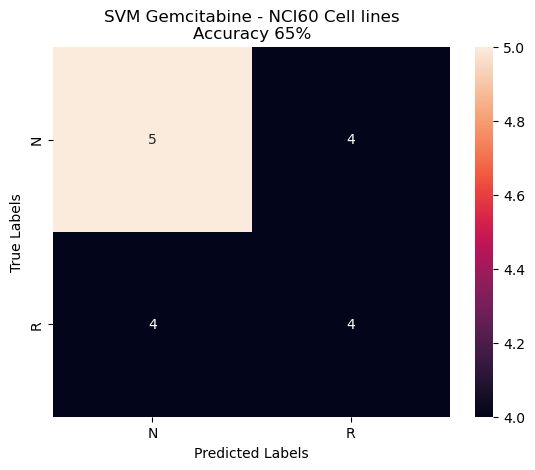

In [20]:
fig, ax = plt.subplots()
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, xticklabels = ['N', 'R'], yticklabels = ['N', 'R'])
ax.set_title('SVM Gemcitabine - NCI60 Cell lines\nAccuracy 65%')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')

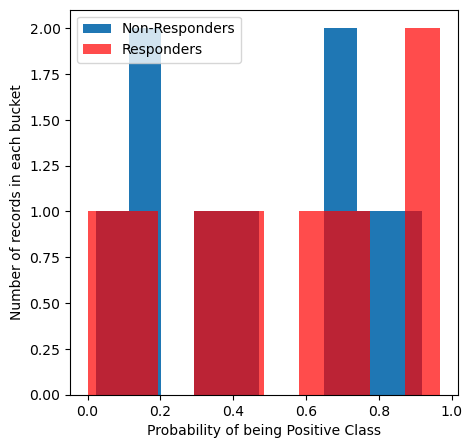

In [21]:
plt.figure(figsize=(5, 5))
plt.hist(prediction2[y_test==0], label='Non-Responders')
plt.hist(prediction2[y_test==1], label='Responders', alpha=0.7, color='r')
plt.xlabel('Probability of being Positive Class')
plt.ylabel('Number of records in each bucket')
plt.legend()
plt.tick_params(axis='both')
plt.show() 

In [22]:
resp_svm = prediction2[y_test == 1]
count = 0
for i in resp_svm:
    if i >= max(prediction2[y_test == 0]):
        count+=1
count, count/len(resp_svm)

(1, 0.125)

In [23]:
max(prediction2[y_test == 0])

0.9201073233476355

In [24]:
df_svm_test = X_test.copy()
df_svm_test.loc[test_index, 'test_proba'] = prediction2

df2 = pd.concat([X_train, df_svm_test], sort=False).sort_index()

In [25]:
df2_main = df2.iloc[:49, ]
df2_main = df2_main.loc[(df2_main['test_proba'] > max(prediction2[y_test == 0]))]
df2_main

,Acetone ; Propanal ; acetone,Acetaldehyde oxime ; HMDB01122,acetate,Urea,Isopropyl alcohol ; Propyl alcohol,Bicarbonate ; Hydrogen carbonate,Dimethylsulfide,3-Butyn-1-al,1-pyrrolinium,Acrylamide,...,"TG(22:6(4Z,7Z,10Z,13Z,16Z,19Z)/20:5(5Z,8Z,11Z,14Z,17Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))_iso3_","2,4,7,10-hexadecatetraenoylcoa ; 2,7,10,13-hexadecatetraenoylcoa ; 2E,4Z,7Z,10Z-hexadecatetraenoyl-CoA ; 3,7,10,13-hexadecatetraenoylcoa ; 4,7,10,13-hexadecatetraenoylcoa",O-b-D-glucopyranosyl-(1->3)-O-2-(acetylamino)-2-deoxy-b-D-glucopyranosyl-(1->3)-O-_6-deoxy-a-L-galactopyranosyl-(1->4)_-O-b-D-galactopyranosyl-(1->4)-O-_6-deoxy-a-L-galactopyranosyl-(1->3)_-D-Glucose,LS tetrasaccharide d ; Sialyllacto-N-neotetraose c ; Sialyllacto-N-tetraose a ; Sialyllacto-N-tetraose b ; Sialyllacto-N-tetraose c,PIP2(16:0/18:0) ; PIP2(18:0/16:0),"TG(22:5(7Z,10Z,13Z,16Z,19Z)/20:5(5Z,8Z,11Z,14Z,17Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))_iso6_ ; TG(22:6(4Z,7Z,10Z,13Z,16Z,19Z)/20:4(5Z,8Z,11Z,14Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))_iso3_","(2E)-Hexadecenoyl-CoA ; 2,7,10-hexadecatrienoylcoa ; 3,7,10-hexadecatrienoylcoa ; 3Z,7Z,10Z-hexadecatrienoyl-CoA ; 4,7,10-hexadecatrienoylcoa ; 4Z,7Z,10Z-hexadecatrienoyl-CoA ; 7,10,13-hexadecatrienoylcoa ; trans,cis,cis-2,7,10-hexadecatrienoyl-CoA",Lacto-N-difucohexaose ; Lacto-N-difucopentaose II,Galabiosylceramide (d18:1/26:1(17Z)) ; Lactosylceramide (d18:1/26:1(17Z)),test_proba
19,0.017639,0.001785,2.454459,0.246197,0.032514,0.119699,0.004779,0.00319,0.001329,0.008451,...,0.028827,0.027301,0.033516,0.028713,0.06261,0.031535,0.020139,0.032979,0.03956,0.968805


In [26]:
model3 = XGBClassifier()
#model3.fit(X_train, y_train)

rfecv3 = RFECV(model3, min_features_to_select=1, step=1, scoring='precision', cv=StratifiedKFold(5))
rfecv3.fit(X_train, y_train)

#prediction3 = model3.predict_proba(X_test)[:, 1]

rfe3 = RFE(model3, n_features_to_select = rfecv3.n_features_, step = 1)
rfe3.fit(X_train, y_train)
prediction3 = rfe3.predict_proba(X_test)[:, 1]
y_pred = rfe3.predict(X_test)

print(f'Accuracy on training data: {accuracy_score(y_train, rfe3.predict(X_train))}')
print(f'Accuracy on testing data: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy on training data: 1.0
Accuracy on testing data: 0.7647058823529411
              precision    recall  f1-score   support

           0       0.73      0.89      0.80         9
           1       0.83      0.62      0.71         8

    accuracy                           0.76        17
   macro avg       0.78      0.76      0.76        17
weighted avg       0.78      0.76      0.76        17



Text(50.722222222222214, 0.5, 'True Labels')

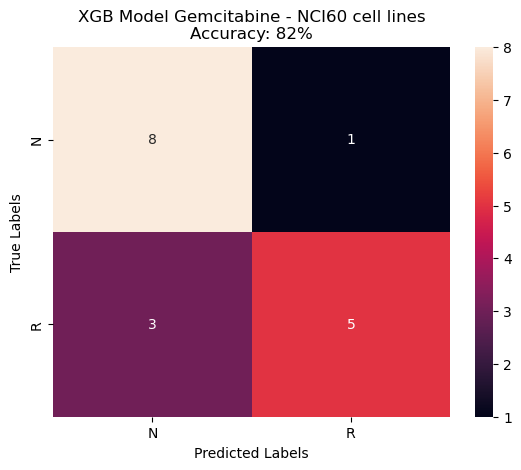

In [27]:
fig, ax = plt.subplots()
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, xticklabels = ['N', 'R'], yticklabels = ['N', 'R'])
ax.set_title('XGB Model Gemcitabine - NCI60 cell lines\nAccuracy: 82%')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')

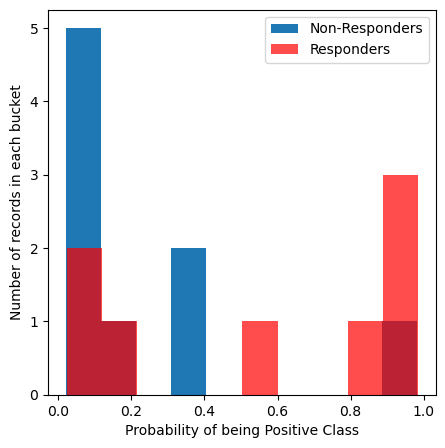

In [28]:
plt.figure(figsize=(5, 5))
plt.hist(prediction3[y_test==0], label='Non-Responders')
plt.hist(prediction3[y_test==1], label='Responders', alpha=0.7, color='r')
plt.xlabel('Probability of being Positive Class')
plt.ylabel('Number of records in each bucket')
plt.legend()
plt.tick_params(axis='both')
plt.show() 

In [29]:
resp_xg = prediction3[y_test == 1]
count = 0
for i in resp_xg:
    if i >= max(prediction3[y_test == 0]):
        count += 1
count, count/len(resp_xg)

(3, 0.375)

In [30]:
df_xg = X_test.copy()
df_xg.loc[test_index, 'test_proba'] = prediction3

df3 = pd.concat([X_train, df_xg], sort=False).sort_index()
df3

,Acetone ; Propanal ; acetone,Acetaldehyde oxime ; HMDB01122,acetate,Urea,Isopropyl alcohol ; Propyl alcohol,Bicarbonate ; Hydrogen carbonate,Dimethylsulfide,3-Butyn-1-al,1-pyrrolinium,Acrylamide,...,"TG(22:6(4Z,7Z,10Z,13Z,16Z,19Z)/20:5(5Z,8Z,11Z,14Z,17Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))_iso3_","2,4,7,10-hexadecatetraenoylcoa ; 2,7,10,13-hexadecatetraenoylcoa ; 2E,4Z,7Z,10Z-hexadecatetraenoyl-CoA ; 3,7,10,13-hexadecatetraenoylcoa ; 4,7,10,13-hexadecatetraenoylcoa",O-b-D-glucopyranosyl-(1->3)-O-2-(acetylamino)-2-deoxy-b-D-glucopyranosyl-(1->3)-O-_6-deoxy-a-L-galactopyranosyl-(1->4)_-O-b-D-galactopyranosyl-(1->4)-O-_6-deoxy-a-L-galactopyranosyl-(1->3)_-D-Glucose,LS tetrasaccharide d ; Sialyllacto-N-neotetraose c ; Sialyllacto-N-tetraose a ; Sialyllacto-N-tetraose b ; Sialyllacto-N-tetraose c,PIP2(16:0/18:0) ; PIP2(18:0/16:0),"TG(22:5(7Z,10Z,13Z,16Z,19Z)/20:5(5Z,8Z,11Z,14Z,17Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))_iso6_ ; TG(22:6(4Z,7Z,10Z,13Z,16Z,19Z)/20:4(5Z,8Z,11Z,14Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))_iso3_","(2E)-Hexadecenoyl-CoA ; 2,7,10-hexadecatrienoylcoa ; 3,7,10-hexadecatrienoylcoa ; 3Z,7Z,10Z-hexadecatrienoyl-CoA ; 4,7,10-hexadecatrienoylcoa ; 4Z,7Z,10Z-hexadecatrienoyl-CoA ; 7,10,13-hexadecatrienoylcoa ; trans,cis,cis-2,7,10-hexadecatrienoyl-CoA",Lacto-N-difucohexaose ; Lacto-N-difucopentaose II,Galabiosylceramide (d18:1/26:1(17Z)) ; Lactosylceramide (d18:1/26:1(17Z)),test_proba
0,0.021811,0.006137,1.801231,0.178675,0.031762,0.143416,0.004437,0.001118,0.002353,0.013185,...,0.029462,0.029300,0.036367,0.025836,0.075427,0.036502,0.019935,0.032820,0.039391,NaN
1,0.010611,0.006815,0.884542,0.093390,0.016027,0.037372,0.000000,0.005778,0.003199,0.011203,...,0.026807,0.021282,0.024981,0.013982,0.054200,0.029125,0.010750,0.015981,0.035154,NaN
2,0.030946,0.006278,3.830076,0.384303,0.027088,0.065463,0.002946,0.009472,0.002344,0.010895,...,0.031639,0.026098,0.029986,0.025863,0.053371,0.038207,0.023270,0.030655,0.040250,NaN
3,0.008574,0.005661,0.296663,0.035179,0.005575,0.026321,0.001608,0.020112,0.003865,0.016057,...,0.029439,0.032452,0.034177,0.022305,0.080242,0.029226,0.019556,0.033062,0.040780,0.404686
4,0.012726,0.003326,0.000000,0.000000,0.005354,0.037794,0.002402,0.013558,0.003402,0.013344,...,0.023395,0.027523,0.018876,0.016423,0.057103,0.022155,0.011501,0.014310,0.034584,NaN
5,0.011141,0.009984,0.659236,0.065128,0.017453,0.051079,0.002598,0.012055,0.003386,0.030684,...,0.027441,0.024676,0.025293,0.022498,0.058869,0.030951,0.022203,0.019651,0.031818,0.020469
6,0.005588,0.004644,1.364809,0.135459,0.000000,0.000000,0.000000,0.009729,0.004694,0.014806,...,0.034059,0.023589,0.030071,0.020941,0.076639,0.037050,0.018037,0.026653,0.048694,0.062482
7,0.000000,0.010606,0.357949,0.030093,0.000118,0.000000,0.000000,0.014046,0.003836,0.011710,...,0.017312,0.036422,0.020904,0.014142,0.045556,0.015521,0.005963,0.013949,0.018294,NaN
8,0.019640,0.003646,1.898384,0.190011,0.010889,0.053844,0.002557,0.003097,0.002219,0.008285,...,0.034846,0.023713,0.035921,0.028130,0.062201,0.037373,0.024979,0.035588,0.046249,0.982196
9,0.027977,0.006610,2.859095,0.287990,0.040888,0.133469,0.004142,0.004474,0.004813,0.017765,...,0.036054,0.032427,0.036866,0.028432,0.068422,0.039218,0.024986,0.032742,0.047071,NaN


In [31]:
df3_main = df3.iloc[:49, ]
df3_main = df3_main.loc[(df3_main['test_proba'] > max(prediction3[y_test == 0]))]
df3_main.shape

(1, 2182)

In [32]:
df3_main

,Acetone ; Propanal ; acetone,Acetaldehyde oxime ; HMDB01122,acetate,Urea,Isopropyl alcohol ; Propyl alcohol,Bicarbonate ; Hydrogen carbonate,Dimethylsulfide,3-Butyn-1-al,1-pyrrolinium,Acrylamide,...,"TG(22:6(4Z,7Z,10Z,13Z,16Z,19Z)/20:5(5Z,8Z,11Z,14Z,17Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))_iso3_","2,4,7,10-hexadecatetraenoylcoa ; 2,7,10,13-hexadecatetraenoylcoa ; 2E,4Z,7Z,10Z-hexadecatetraenoyl-CoA ; 3,7,10,13-hexadecatetraenoylcoa ; 4,7,10,13-hexadecatetraenoylcoa",O-b-D-glucopyranosyl-(1->3)-O-2-(acetylamino)-2-deoxy-b-D-glucopyranosyl-(1->3)-O-_6-deoxy-a-L-galactopyranosyl-(1->4)_-O-b-D-galactopyranosyl-(1->4)-O-_6-deoxy-a-L-galactopyranosyl-(1->3)_-D-Glucose,LS tetrasaccharide d ; Sialyllacto-N-neotetraose c ; Sialyllacto-N-tetraose a ; Sialyllacto-N-tetraose b ; Sialyllacto-N-tetraose c,PIP2(16:0/18:0) ; PIP2(18:0/16:0),"TG(22:5(7Z,10Z,13Z,16Z,19Z)/20:5(5Z,8Z,11Z,14Z,17Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))_iso6_ ; TG(22:6(4Z,7Z,10Z,13Z,16Z,19Z)/20:4(5Z,8Z,11Z,14Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))_iso3_","(2E)-Hexadecenoyl-CoA ; 2,7,10-hexadecatrienoylcoa ; 3,7,10-hexadecatrienoylcoa ; 3Z,7Z,10Z-hexadecatrienoyl-CoA ; 4,7,10-hexadecatrienoylcoa ; 4Z,7Z,10Z-hexadecatrienoyl-CoA ; 7,10,13-hexadecatrienoylcoa ; trans,cis,cis-2,7,10-hexadecatrienoyl-CoA",Lacto-N-difucohexaose ; Lacto-N-difucopentaose II,Galabiosylceramide (d18:1/26:1(17Z)) ; Lactosylceramide (d18:1/26:1(17Z)),test_proba
45,0.013196,0.002906,1.675851,0.168906,0.012024,0.044982,0.001773,0.004601,0.001948,0.006204,...,0.02798,0.021465,0.034015,0.025258,0.055743,0.030627,0.021747,0.032798,0.040198,0.984468


In [33]:
max(prediction3[y_test == 0])

0.98219633

In [34]:
unique, counts = np.unique(y_train, return_counts=True)

In [35]:
dict(zip(unique, counts))

{0: 16, 1: 17}

In [36]:
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0: 9, 1: 8}

In [37]:
common_list = []
common_list.extend(list(df1_main.index.values))
common_list.extend(list(df2_main.index.values))
common_list.extend(list(df3_main.index.values))
cl = set(common_list)

In [38]:
with open('master_list_metabolomics.txt', 'a+') as f:
    for i in cl:
        f.write(f'{i}\n')

In [39]:
cl

{19, 45}

In [40]:
df1_total = df1.iloc[:49, ]
df1_total = df1_total.loc[df1_total['target'] == 1.0]
df1_total

,Acetone ; Propanal ; acetone,Acetaldehyde oxime ; HMDB01122,acetate,Urea,Isopropyl alcohol ; Propyl alcohol,Bicarbonate ; Hydrogen carbonate,Dimethylsulfide,3-Butyn-1-al,1-pyrrolinium,Acrylamide,...,"2,4,7,10-hexadecatetraenoylcoa ; 2,7,10,13-hexadecatetraenoylcoa ; 2E,4Z,7Z,10Z-hexadecatetraenoyl-CoA ; 3,7,10,13-hexadecatetraenoylcoa ; 4,7,10,13-hexadecatetraenoylcoa",O-b-D-glucopyranosyl-(1->3)-O-2-(acetylamino)-2-deoxy-b-D-glucopyranosyl-(1->3)-O-_6-deoxy-a-L-galactopyranosyl-(1->4)_-O-b-D-galactopyranosyl-(1->4)-O-_6-deoxy-a-L-galactopyranosyl-(1->3)_-D-Glucose,LS tetrasaccharide d ; Sialyllacto-N-neotetraose c ; Sialyllacto-N-tetraose a ; Sialyllacto-N-tetraose b ; Sialyllacto-N-tetraose c,PIP2(16:0/18:0) ; PIP2(18:0/16:0),"TG(22:5(7Z,10Z,13Z,16Z,19Z)/20:5(5Z,8Z,11Z,14Z,17Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))_iso6_ ; TG(22:6(4Z,7Z,10Z,13Z,16Z,19Z)/20:4(5Z,8Z,11Z,14Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))_iso3_","(2E)-Hexadecenoyl-CoA ; 2,7,10-hexadecatrienoylcoa ; 3,7,10-hexadecatrienoylcoa ; 3Z,7Z,10Z-hexadecatrienoyl-CoA ; 4,7,10-hexadecatrienoylcoa ; 4Z,7Z,10Z-hexadecatrienoyl-CoA ; 7,10,13-hexadecatrienoylcoa ; trans,cis,cis-2,7,10-hexadecatrienoyl-CoA",Lacto-N-difucohexaose ; Lacto-N-difucopentaose II,Galabiosylceramide (d18:1/26:1(17Z)) ; Lactosylceramide (d18:1/26:1(17Z)),test_proba,target
13,0.033523,0.009218,1.059579,0.109258,0.014784,0.032721,0.001313,0.005751,0.008299,0.032031,...,0.020374,0.031512,0.025023,0.062053,0.029968,0.024340,0.029870,0.036048,0.573333,1.0
14,0.020936,0.006008,2.162611,0.216662,0.022609,0.055089,0.001374,0.014707,0.004673,0.025133,...,0.033130,0.042306,0.028578,0.083914,0.034131,0.037424,0.046017,0.040396,0.440000,1.0
19,0.017639,0.001785,2.454459,0.246197,0.032514,0.119699,0.004779,0.003190,0.001329,0.008451,...,0.027301,0.033516,0.028713,0.062610,0.031535,0.020139,0.032979,0.039560,0.800000,1.0
29,0.000000,0.015064,0.000000,0.000000,0.000000,0.017886,0.000000,0.032641,0.004539,0.020766,...,0.010682,0.024528,0.026065,0.053689,0.014643,0.017765,0.016910,0.027073,0.273333,1.0
36,0.030633,0.003414,2.542078,0.255671,0.034007,0.152319,0.005659,0.005803,0.001914,0.018036,...,0.034755,0.054614,0.035515,0.082388,0.038592,0.027058,0.050154,0.040684,0.873333,1.0
37,0.000000,0.006458,0.050548,0.012002,0.000000,0.000000,0.000642,0.020524,0.003171,0.006387,...,0.023151,0.018226,0.013784,0.054095,0.019990,0.014045,0.013133,0.027973,0.200000,1.0
44,0.017482,0.007055,2.939951,0.282600,0.018621,0.040777,0.001871,0.022287,0.002229,0.014295,...,0.025446,0.031473,0.021851,0.079911,0.022523,0.019170,0.027684,0.027955,0.173333,1.0
45,0.013196,0.002906,1.675851,0.168906,0.012024,0.044982,0.001773,0.004601,0.001948,0.006204,...,0.021465,0.034015,0.025258,0.055743,0.030627,0.021747,0.032798,0.040198,0.786667,1.0


In [41]:
l = list(df1_total.index.values)
with open('total_metabolomics.txt', 'a+') as f:
    for i in l:
        f.write(f'{i}\n')

In [42]:
l

[13, 14, 19, 29, 36, 37, 44, 45]

In [43]:
cl

{19, 45}